# XRR Analysis

In [6]:
#http://blog.nextgenetics.net/?e=102
from IPython.display import HTML
HTML('''<script>
code_show_2=true; 
function code_toggle_2() {
 if (code_show_2){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show_2 = !code_show_2
} 
$( document ).ready(code_toggle_2);
</script>
The raw code for this Jupyter Notebook is by default hidden for easier reading.
To toggle on/off the raw code for this entire notebook, click <a href="javascript:code_toggle_2()">here</a>.''')


In [7]:
# importing the necessary libraries and packages for XRR.ipynb
import ipywidgets as widgets
from ipywidgets import Label, Layout
from IPython.display import display, Markdown, clear_output
from IPython.display import display
from IPython.display import Image
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy import integrate
from IPython.display import IFrame



# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
# https://gist.github.com/Zsailer/5d1f4e357c78409dd9a5a4e5c61be552

# This tag allows the supression of input cells that have to deal with formatting and code.
# You are viewing the "code" version of the "click here" button you just pressed
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
(To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.)''')
display(tag)

# 5. Data Reduction and Analysis

Data has no meaning until you analyze. Here we will visualize and perform a basic analysis of the XRR data you just recorded. In the cell below, please replace the default file name with your file name. Then, you can run the cell blocks below to plot and fit your XRR sample data.

###### xrr.csv example (Fe2O3 on Al2O3 from Joseph McCourt and Roger Reinertsen 461 project 2019)

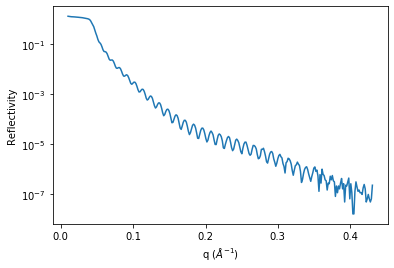

In [8]:
# The default file_name refers to example data for XRR. Please reassign file_name to the name of your file
# e.g. file_name = "your_file_name.ras"
display(tag)
file_name = "example/xrr.csv"

# The code below will show a plot of your data on a log scale with appropriate axes labels
data = pd.read_csv(file_name,header=None)
plt.plot(data[0],data[1])
plt.yscale('log')
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('Reflectivity')
plt.show()

### Inspecting the Data: First step to Analysis

Following **Fig. 1**, we will now do approximations of certain features of the data. It is a good practice to inspect the data first before immediately performing a fit. This way, you will be able to tell whether or not your data makes sense and understand more about what the fit is telling you.

  1. Find $\theta_\text{critical}$
  2. Approximate thickness (related period of oscillations)
  3. Approximate roughness 

#### Theory and Fitting the Data

Here is the equation we will be using to fit the data. 

$$R = \Big[\Big(\frac{2q}{q_c}\Big)^{2}-1-\Big(\frac{2q}{q_c}\Big)\sqrt{\Big(\frac{q}{qc}\Big)^2-1}\Big]\Big(1-4B(1-B)\Big(\sin\frac{qt}{2}\Big)^{2}\Big)\exp^{-q^2\sigma^2}$$

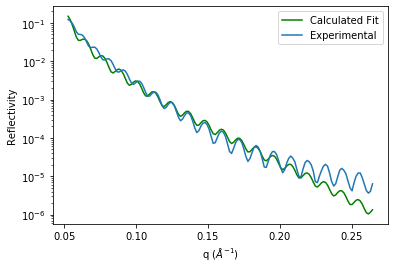

B = 1.1635224931773538
thickness (t) [Angstroms] = 529.6936314519822
sigma (roughness) [Angstroms] = 7.65190221099023


In [9]:
display(tag)

# need to add in a way to locate the q_critical (q_c) instead of just manually inputting the value
qc = 0.045

def rf(q):
    return (2*(q/qc)**2-1-2*(q/qc)*np.sqrt((q/qc)**2-1))**2

def r_lowq(q,B,t,sigma):
    return (1-4*B*(1-B)*(np.sin(q*t/2))**2)*np.exp(-q**2*sigma**2)

def r(q,B,t,sigma):
    return rf(q)*r_lowq(q,B,t,sigma)

#only fit certain range of low q data
sliceobj=slice(30,180)

guess = [1.3,525,8]
popt, pcov = curve_fit(r, data[0][sliceobj], data[1][sliceobj],sigma = data[1][sliceobj],p0 = guess)

plt.yscale('log')
plt.plot(data[0][sliceobj],r(data[0][sliceobj],*popt),label = "Calculated Fit",color ='g')
plt.errorbar(data[0][sliceobj], data[1][sliceobj],label="Experimental",ecolor='r')
plt.legend()
plt.xlabel('q ($\AA^{-1}$)')
plt.ylabel('Reflectivity')
plt.show()

print("B = " + str(popt[0]))
print("thickness (t) [Angstroms] = " + str(popt[1]))
print("sigma (roughness) [Angstroms] = " + str(popt[2]))

<div class="alert alert-block alert-info">
    <strong> Think about it... </strong>
    
What are units of the $B$ parameter and what does it represent? Does this value make sense for the sample you measured?
</div>

Here is a slide from your class lecture on thin film reflectivity. The formula above should now look more familiar.

<img src="images/thin_film_reflectivity_class_slide.png" />

In [10]:
display(tag)
# # Instead of setting the cell to Markdown, create Markdown from withnin a code cell!
# # We can just use python variable replacement syntax to make the text dynamic
# Markdown("| Parameter | Value   | \
#          \n|------|------|\
#          \n|   a  | {}|\
#          \n|   b  | {}|\
#          \n|   Straight Through Beam  | {}|\
#          \n|   Slit Size  | {}|".format(a,b,straight_through_beam,slit_size))